In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Set dataset flag: 'mnist' or 'cifar10'
dataset_name = 'cifar10' # Change to 'mnist' or 'cifar10' as needed
# CIFAR-10 class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
# Load and preprocess dataset
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True
elif dataset_name == 'cifar10':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    input_shape = (32, 32, 3)
    num_classes = 10
    grayscale = False

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 4
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3816 - loss: 1.6891 - val_accuracy: 0.5707 - val_loss: 1.2266
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.5902 - loss: 1.1634 - val_accuracy: 0.6282 - val_loss: 1.0716
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6461 - loss: 1.0111 - val_accuracy: 0.6396 - val_loss: 1.0269
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6758 - loss: 0.9315 - val_accuracy: 0.6566 - val_loss: 0.9922


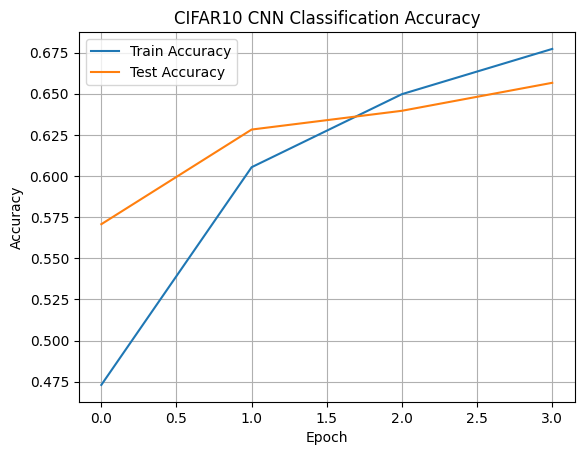

In [11]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_name.upper()} CNN Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


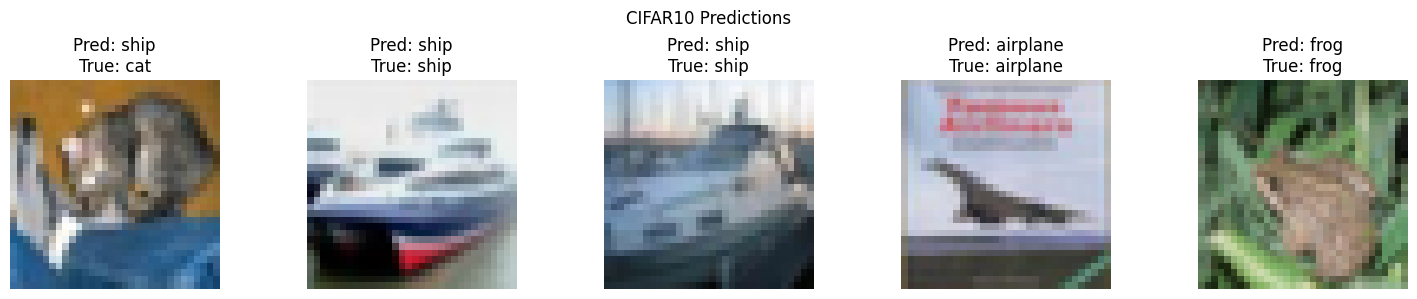

In [14]:
#Display & Predict Images
# ----------------------------

num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    image = X_test[i]
    label = y_test[i]
    prediction = model.predict(image.reshape(1, *input_shape))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_images, i + 1)
    if grayscale:
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        plt.imshow(image)

    if dataset_name == 'cifar10':
        pred_name = cifar10_labels[predicted_label]
        true_name = cifar10_labels[label]
        plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    else:
        plt.title(f"Pred: {predicted_label}\nTrue: {label}")
    plt.axis('off')

plt.suptitle(f'{dataset_name.upper()} Predictions')
plt.tight_layout()
plt.show()
